### Relatório contendo gráficos e insights sobre dados utilizados

In [12]:
# Bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [13]:
# Conectar ao banco de dados SQLite
conn = sqlite3.connect('global_temperatures.db')

# Carregar os dados do banco de dados para um DataFrame
df = pd.read_sql_query('SELECT * FROM temperatures', conn)

In [14]:
# Exibir as primeiras linhas do dataset
print("Antes do tratamento de dados:")
print(df.head())

Antes do tratamento de dados:
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1744-04-01               1.530                          4.680   Åland
2  1744-05-01               6.702                          1.789   Åland
3  1744-06-01              11.609                          1.577   Åland
4  1744-07-01              15.342                          1.410   Åland


In [15]:
# Tratamento de dados: Remover valores null e NaN
df.dropna(inplace=True)

# Exibir as primeiras linhas do dataset após o tratamento de dados
print("Depois do tratamento de dados:")
print(df.head())

Depois do tratamento de dados:
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1744-04-01               1.530                          4.680   Åland
2  1744-05-01               6.702                          1.789   Åland
3  1744-06-01              11.609                          1.577   Åland
4  1744-07-01              15.342                          1.410   Åland


In [22]:
# Converter a coluna 'dt' para datetime
df['dt'] = pd.to_datetime(df['dt'])

# Verificar a conversão correta das datas
print("Datas convertidas:")
print(df['dt'].head())

# Extrair o ano e mês
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month

# Verificar a extração correta de ano e mês
print("Ano e mês extraídos:")
print(df[['year', 'month']].head())

Datas convertidas:
0   1743-11-01
1   1744-04-01
2   1744-05-01
3   1744-06-01
4   1744-07-01
Name: dt, dtype: datetime64[ns]
Ano e mês extraídos:
   year  month
0  1743     11
1  1744      4
2  1744      5
3  1744      6
4  1744      7


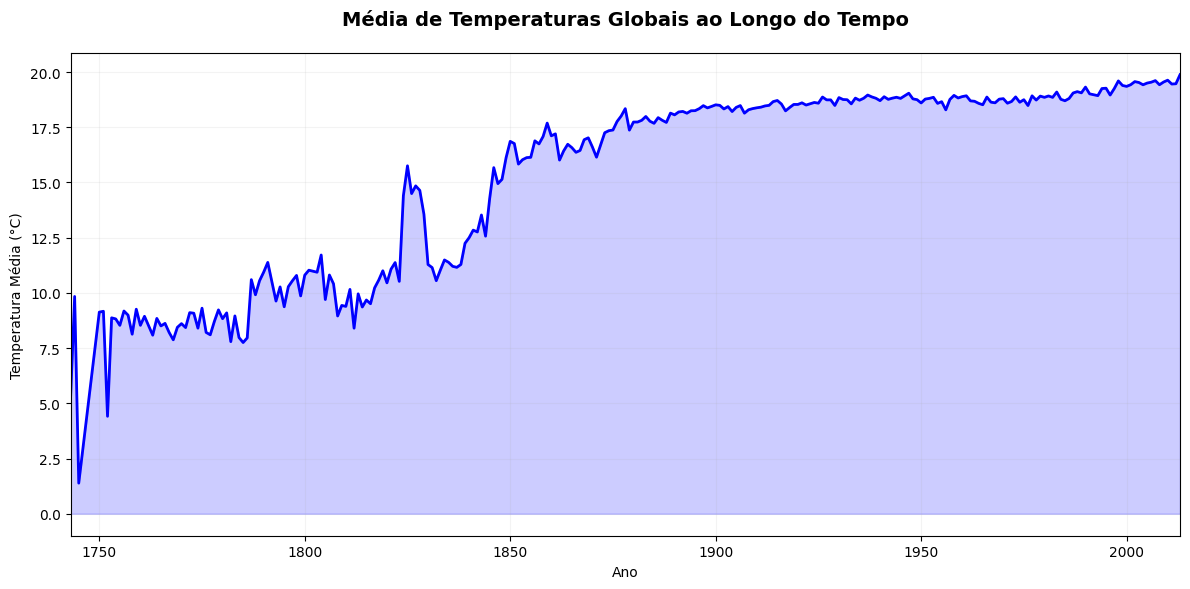

In [53]:
# 1. Média de Temperaturas Globais ao Longo do Tempo

# Calculando a média de temperaturas globais ao longo do tempo
media_temp_global = df.groupby('year')['AverageTemperature'].mean()

# Criando o gráfico com seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=media_temp_global.index, y=media_temp_global.values, color='b', linewidth=2)
plt.fill_between(media_temp_global.index, media_temp_global.values, alpha=0.2, color='b')  # Preenchendo a área abaixo da linha

# Configurações de título e eixos
plt.title('Média de Temperaturas Globais ao Longo do Tempo', pad=20, weight="bold", fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.xlim(1743, 2013)
plt.grid(alpha=0.15)

# Exibindo o gráfico
plt.tight_layout()  # Melhorando a disposição dos elementos no gráfico
plt.show()

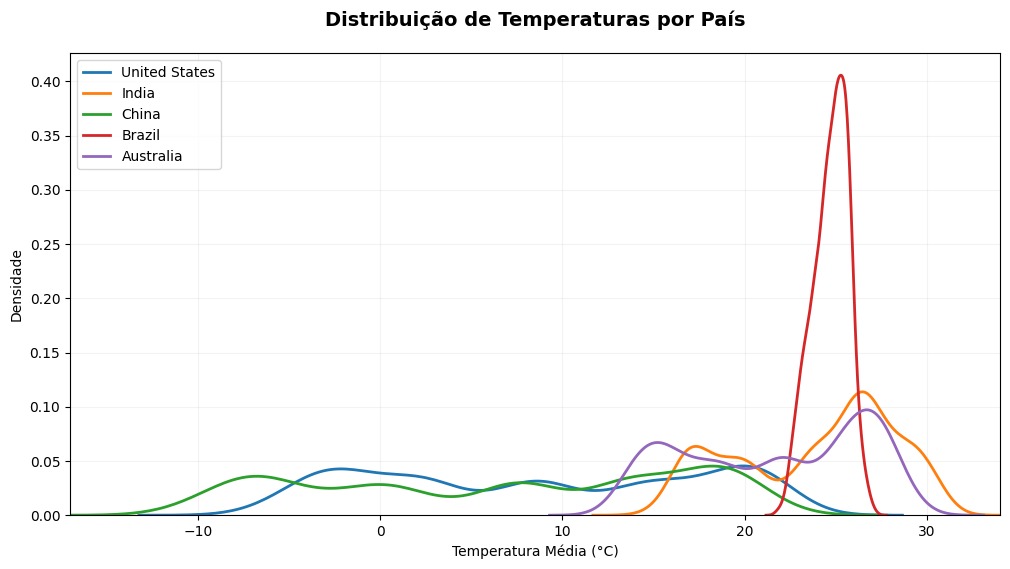

In [72]:
# 2. Distribuição de Temperaturas por País

# Selecionar os países desejados
paises = ['United States', 'India', 'China', 'Brazil', 'Australia']
df_paises = df[df['Country'].isin(paises)]

# Definir o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotar o KDE para cada país
for pais in paises:
    subset = df_paises[df_paises['Country'] == pais]
    sns.kdeplot(subset['AverageTemperature'], label=pais, linewidth=2)

# Configurar o título e os rótulos dos eixos
plt.title('Distribuição de Temperaturas por País', pad=20, weight="bold", fontsize=14)
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Densidade')
plt.grid(alpha=0.15)
plt.xlim(-17, 34)
plt.legend()
plt.show()


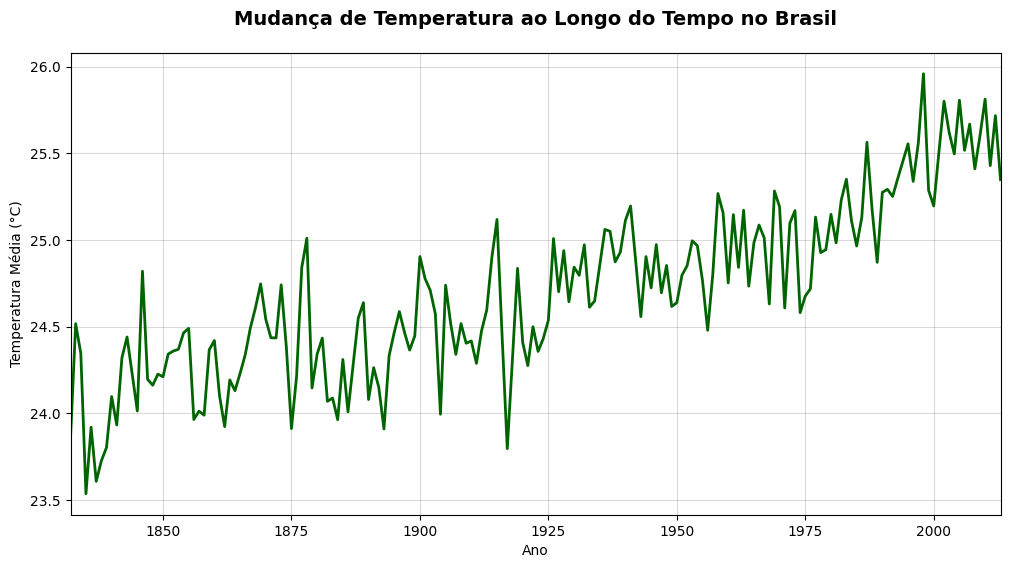

In [82]:
# 3. Mudança de Temperatura ao Longo do Tempo para um País Específico

# Filtrar dados apenas para o Brasil
br_df = df[df['Country'] == 'Brazil']

# Calcular a média anual da temperatura
br_mudanca = br_df.groupby('year')['AverageTemperature'].mean()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Plot da média de temperatura ao longo do tempo
plt.plot(br_mudanca, color='darkgreen', linewidth=2)

# Adicionar título e ajustar parâmetros
plt.title('Mudança de Temperatura ao Longo do Tempo no Brasil', pad=20, weight='bold', fontsize=14)

# Definir rótulos dos eixos x e y
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')

# Definir limites dos eixos x e y
plt.xlim(1832, 2013)

# Adicionar grade de fundo para melhor visualização dos dados
plt.grid(alpha=0.15, color = 'k')

# Mostrar o gráfico
plt.show()


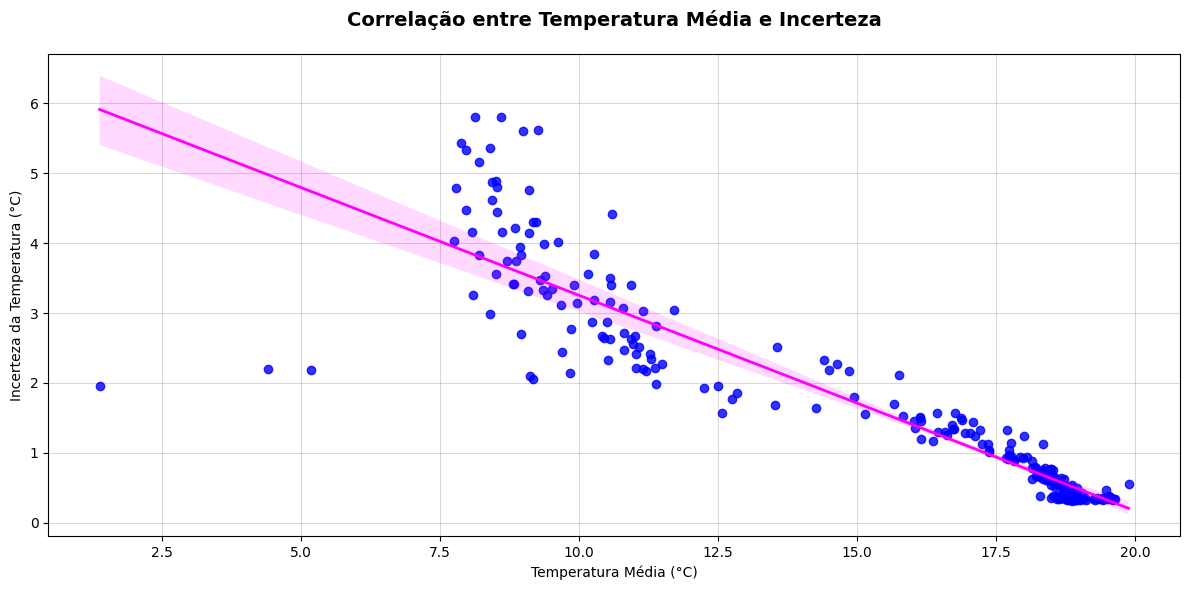

In [102]:
# 4. Correlação entre Temperatura Média e Incerteza

# Calcular a média anual da temperatura e da incerteza
media_temp_global = df.groupby('year')['AverageTemperature'].mean()
media_incerteza_global = df.groupby('year')['AverageTemperatureUncertainty'].mean()

# Criar o gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 6))
sns.regplot(x=media_temp_global.values, y=media_incerteza_global.values, scatter_kws={'color': 'blue'}, line_kws={'color': 'magenta', 'linewidth': 2})

# Adicionar título e rótulos aos eixos
plt.title('Correlação entre Temperatura Média e Incerteza', pad=20, weight='bold', fontsize=14)
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Incerteza da Temperatura (°C)')

# Adicionar grade de fundo para melhor visualização dos dados
plt.grid(alpha=0.15, color = 'k')

# Ajustar o layout para melhorar a legibilidade
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [83]:
# Fechar a conexão com o banco de dados
conn.close()